# 1. Introduction 


In this project i will use Titanic dataset from 
[Titanic Comptetions](https://www.kaggle.com/c/titanic) 
 to predicting the survival of passengers. the story of Titanic is Titanic, launched on May 31, 1911, and set sail on its maiden voyage from Southampton on April 10, 1912, with 2,240 passengers and crew on board. On April 15, 1912, after striking an iceberg, Titanic broke apart and sank to the bottom of the ocean, taking with it the lives of more than 1,500 passengers and crew  [Titanic Story](https://www.noaa.gov/gc-international-section/rms-titanic-history-and-significance#:~:text=Titanic%2C%20launched%20on%20May%2031,than%201%2C500%20passengers%20and%20crew)

In this project i will practice data analysis, data preprocessing, and model building techniques.


# 2. Problem Domain

The problem domain for this project is predicting the survival of passengers on Titanic. the dataset have information about each passenger, for example age,gender, and if  passenger survival or not.

the target of this project is to make a prediction if passenger survival or not based on his characteristics. 

# 3.The problem and solution

The problem of this project is to predict the survival of passengers on Titanic, we can solve the problem by build a classification machine learning model thet train on Titanic dataset and it have a good accouracy, to make prediction if passenger survival of not based on his characteristics. 

the project will help to know which characteristics to foucs on in the future disaster planning to make this not happen again. 

# 4. Steps

The steps in this project will involved : Exploratory Data Analysis (EDA), Data preprocessing, Data transformation, Feature engineering, Feature encoding, Modelling, Model evaluation and hyperparameter tuning, we will see each of them in more details below.


## 4.1 Import libraries


In [118]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter
# A Counter is a dict subclass for counting hashable objects ---> https://docs.python.org/3/library/collections.html


# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.ensemble import RandomForestClassifier


# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#save model
import pickle

## 4.2 Import and read data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("shape of training data : ",train.shape)
print("shape of test data : ",test.shape)

shape of training data :  (891, 12)
shape of test data :  (418, 11)


In [6]:
# we will delete column if we have one unique value its not get meaning to the model 
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## 4.3 Exploratory Data Analysis (EDA)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
train["Sex"].value_counts()

# the number of male in the titanic more than female  

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train[["Sex","Survived"]].groupby("Sex").mean()

# the average of a survived female is higher than male 

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

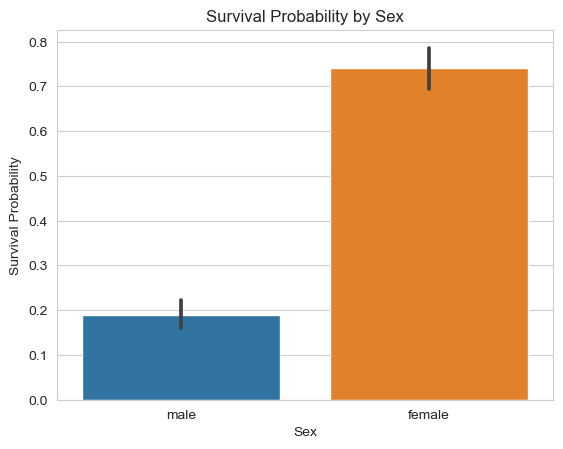

In [16]:
sns.set_style("whitegrid")
sns.barplot(x="Sex",y="Survived",data=train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Sex")

In [17]:
# 0 -->  not survival ,, 1 --> survival 
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

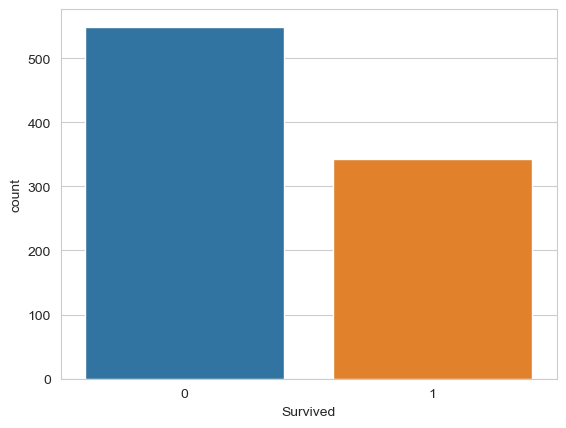

In [18]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train)


In [19]:
train.groupby("Survived")["Sex"].value_counts()
# we see that most of males in the titanic are die 

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

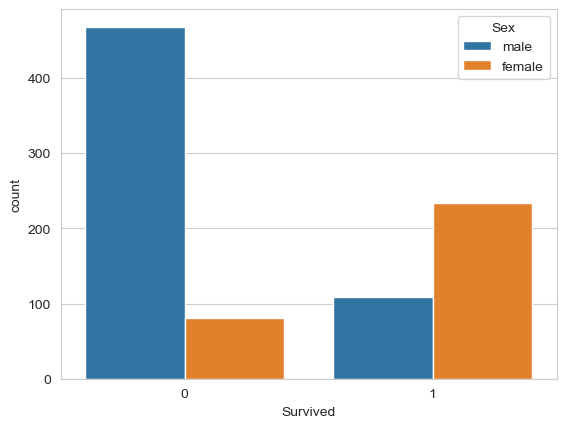

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train,hue="Sex")

In [21]:
train[["Pclass","Survived"]].groupby("Pclass").mean()
# the people in class 1 has higher Probability to survival than other  

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

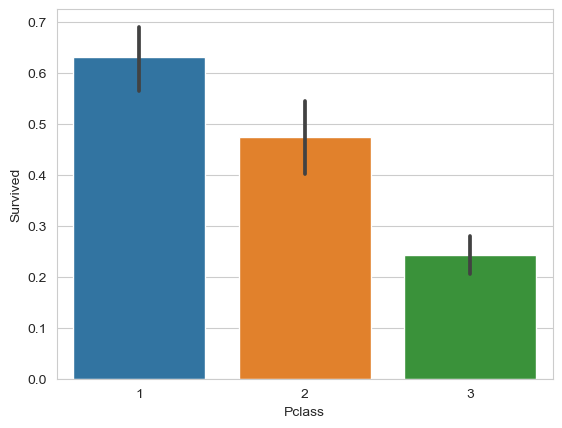

In [22]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass",y="Survived",data=train)

In [23]:
train.groupby(["Survived","Pclass"])["Sex"].value_counts()

Survived  Pclass  Sex   
0         1       male       77
                  female      3
          2       male       91
                  female      6
          3       male      300
                  female     72
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Sex, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

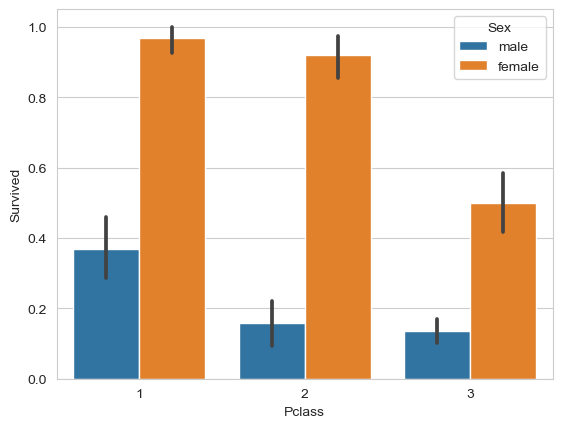

In [24]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass",y="Survived",data=train,hue="Sex")

In [25]:
train.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

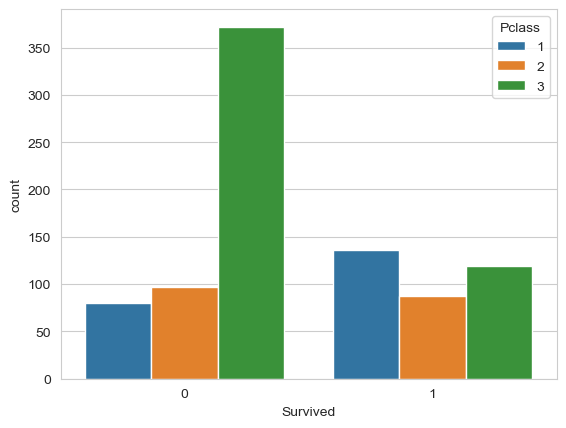

In [26]:
sns.countplot(x="Survived",data=train,hue="Pclass")

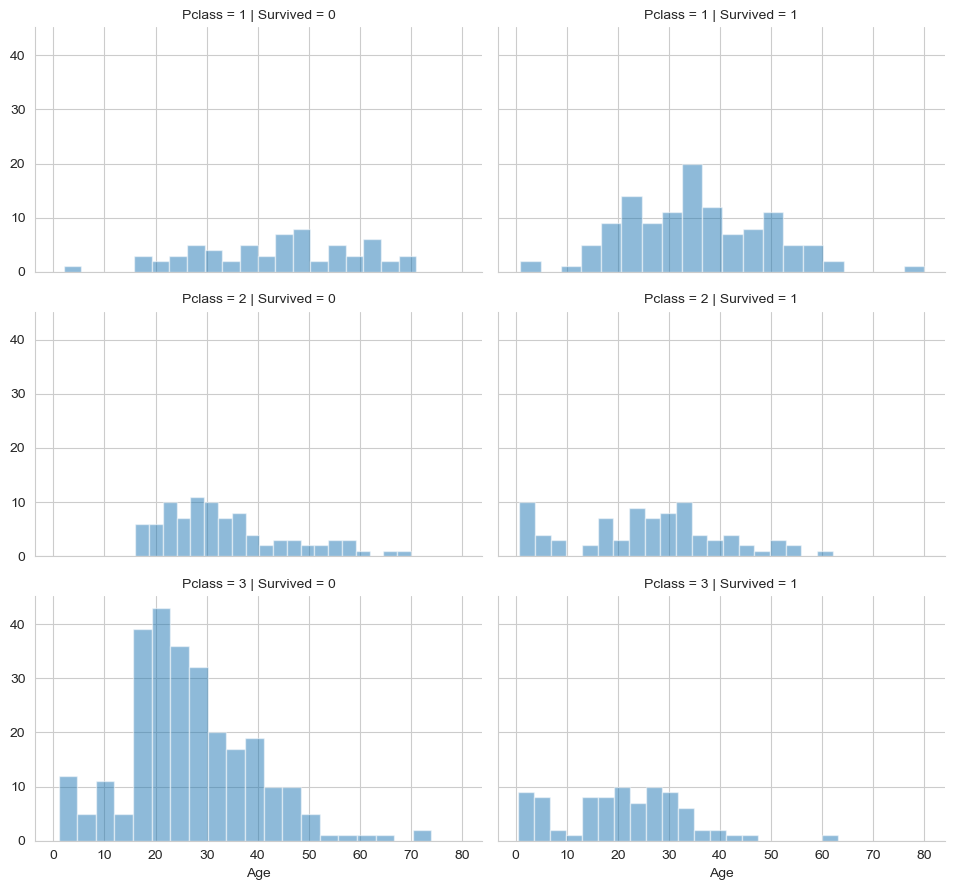

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [28]:
train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [29]:
train[["Embarked","Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

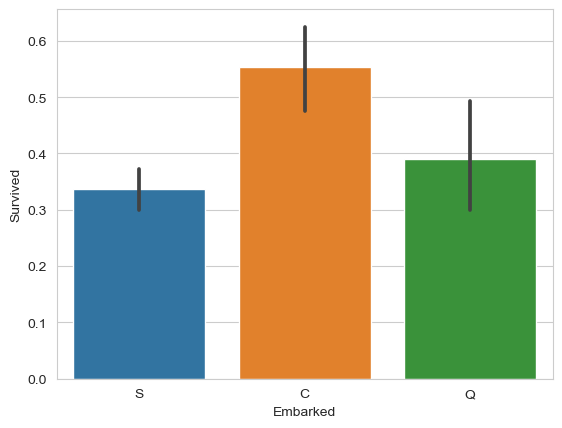

In [30]:
sns.set_style("whitegrid")
sns.barplot(x="Embarked",y="Survived",data=train)

In [31]:
train.groupby("Survived")["Embarked"].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

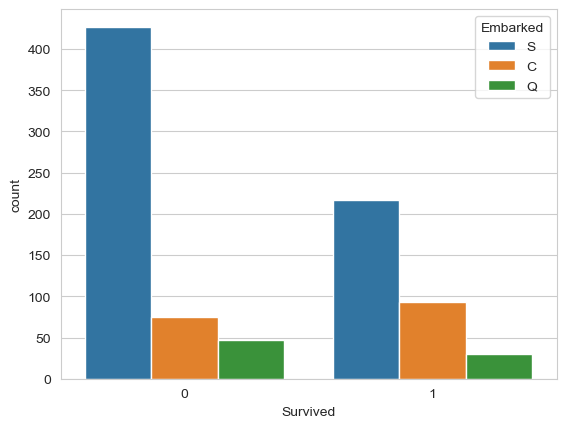

In [32]:
sns.countplot(x="Survived",data=train,hue="Embarked")

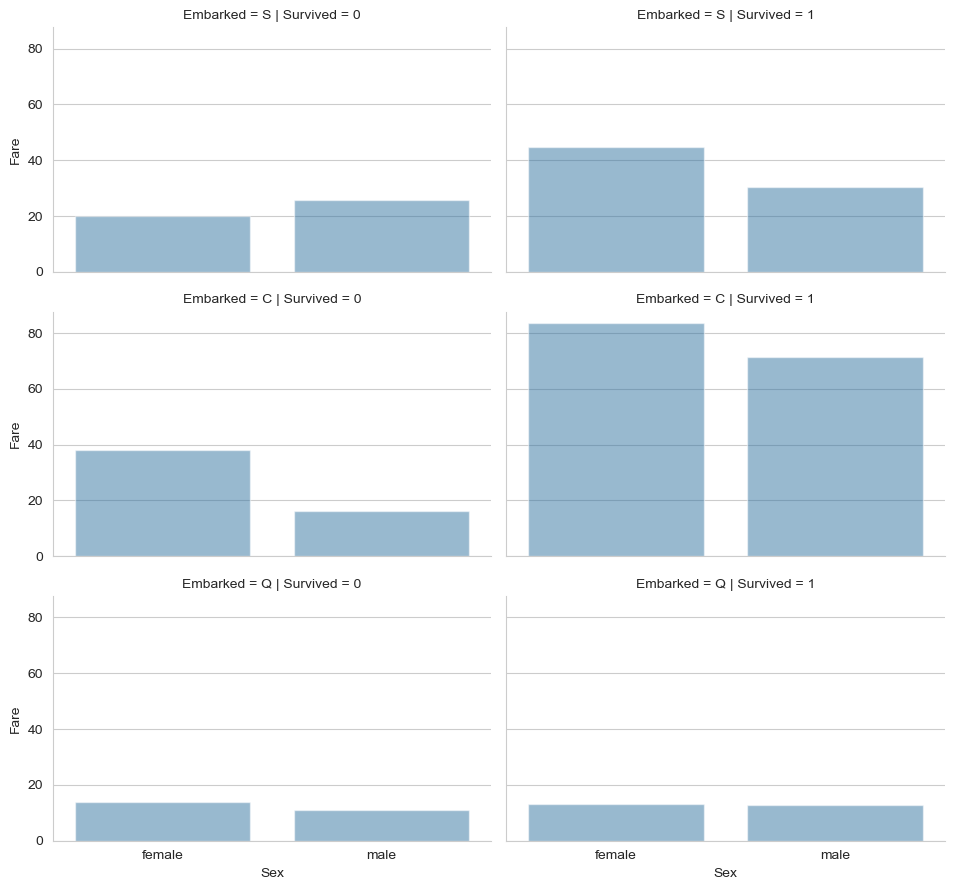

In [33]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 4.4 Drop Outliers

In [34]:
## remove outlier from numeric feature 
## by using interquartile range
def detect_outliers(df, n, features):
    """
    remove outlier from numeric feature 
    
    Input :
    df: dataframe
    n: minum value
    features: columns to lock on it 
    
    Output:
    return outliers rows
    
    
    
    """
    
    outlier_indices = [] 
    for col in features: 
        Q1 ,Q3 = np.percentile(df[col], [25,75])
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        lower_bound = Q1 - outlier_step
        upper_bound = Q1 + outlier_step
        outlier_list_col = df[(df[col] < lower_bound ) | (df[col] > upper_bound)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)





We will drop these 17 indices:  [27, 59, 71, 88, 159, 180, 201, 311, 324, 341, 386, 480, 683, 742, 792, 846, 863]


In [35]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.900,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.550,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.550,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.550,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S


In [36]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 874 rows


<Axes: >

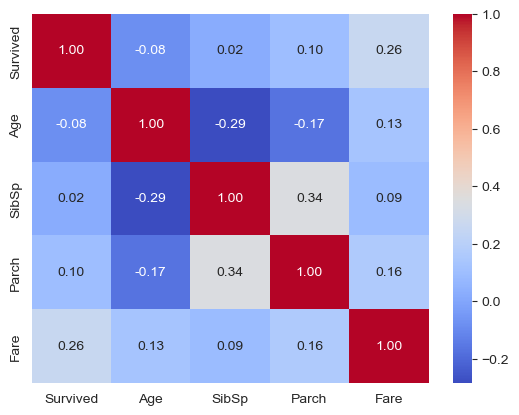

In [37]:
sns.heatmap(train[["Survived","Age","SibSp","Parch","Fare"]].corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [38]:
train["SibSp"].value_counts(dropna=False)

0    608
1    209
2     26
4     18
3     13
Name: SibSp, dtype: int64

In [39]:
train[["Survived","SibSp"]].groupby("SibSp",as_index=False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.423077
0,0,0.345395
4,4,0.166667
3,3,0.153846


Text(0, 0.5, 'Survived Probability')

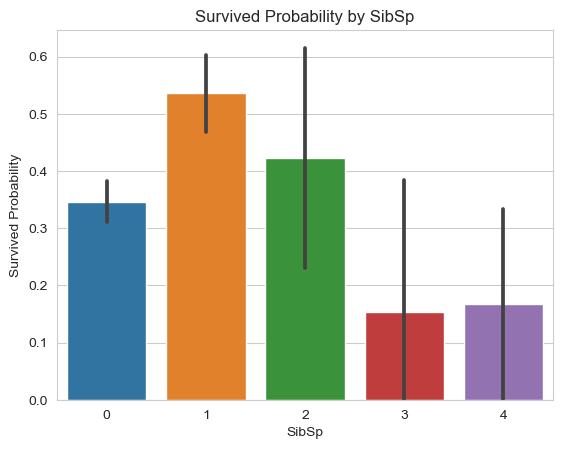

In [40]:
sns.barplot(x="SibSp",y="Survived",data=train)
plt.title("Survived Probability by SibSp")
plt.ylabel("Survived Probability")

In [41]:
train["Parch"].value_counts(dropna=False)

0    678
1    118
2     63
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [42]:
train[["Survived","Parch"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
2,2,0.571429
1,1,0.550847
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0, 0.5, 'Survived Probability')

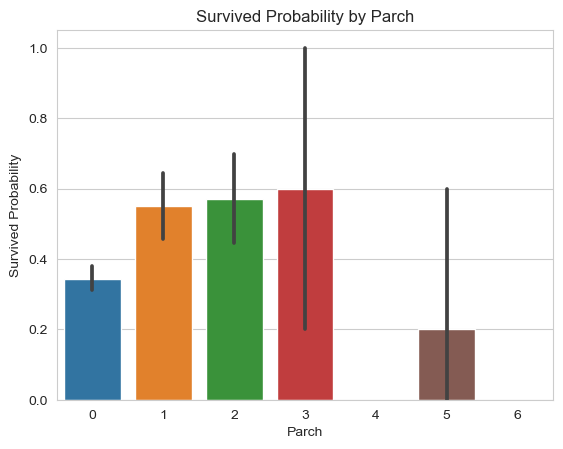

In [43]:
sns.barplot(x="Parch",y="Survived",data=train)
plt.title("Survived Probability by Parch")
plt.ylabel("Survived Probability")

In [44]:
train["Age"].isnull().sum()

170

Text(0.5, 1.0, 'passenger Age Distribution')

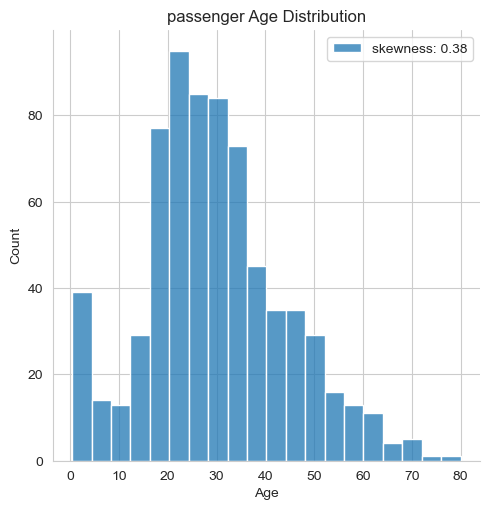

In [45]:
sns.displot(train["Age"],label = "skewness: %.2f"%(train["Age"].skew()))
plt.legend(loc= "best")
plt.title("passenger Age Distribution")

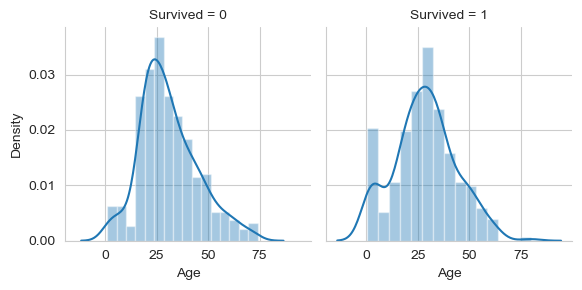

In [46]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

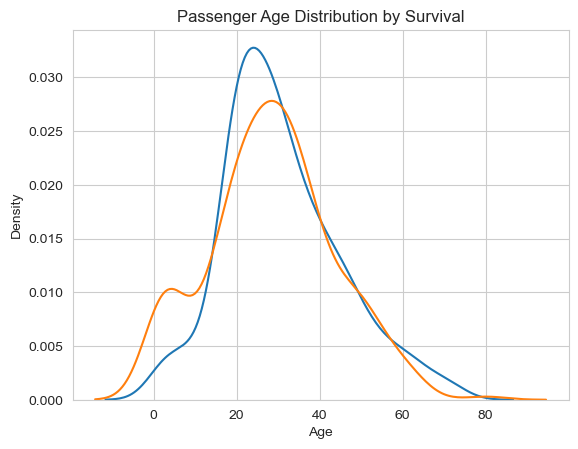

In [47]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [48]:
train["Fare"].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

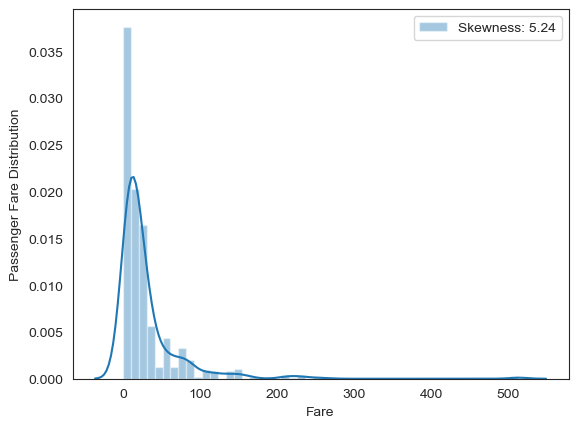

In [49]:
# Passenger fare distribution
sns.set_style("white")
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

## 4.5 Data preprocessing 

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          675
Embarked         2
dtype: int64

<Axes: >

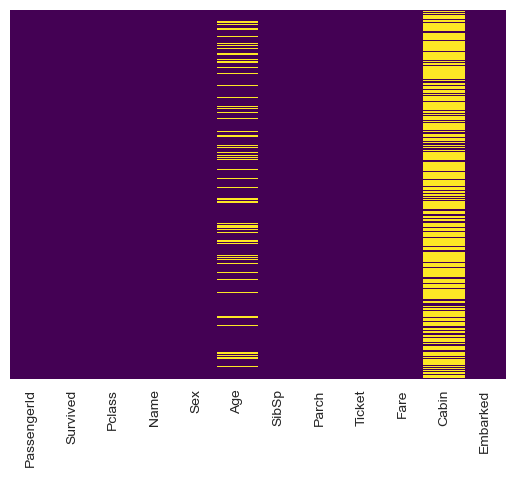

In [51]:
# we will see the mising data in which coulmn by the heatmap graph 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

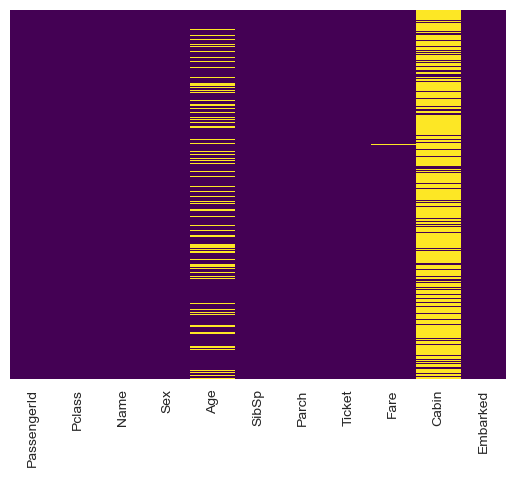

In [53]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis") 


In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
## drop Ticket and Cabin colums (not useful)

train.drop(['Ticket', 'Cabin'], axis = 1 , inplace=True)
test.drop(['Ticket', 'Cabin'], axis = 1 , inplace=True)



In [56]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

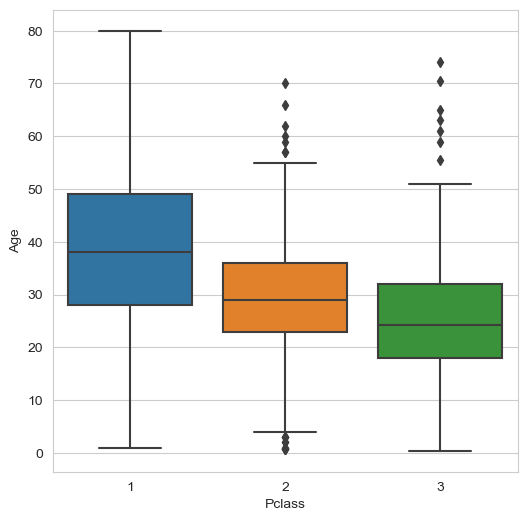

In [57]:
# this is for train dataset
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.boxplot(y=train["Age"],x=train["Pclass"])

In [58]:
print("the avrage age in class 1 : ",train["Age"][train["Pclass"] == 1].mean())
print("the avrage age in class 2 : ",train["Age"][train["Pclass"] == 2].mean())
print("the avrage age in class 3 : ",train["Age"][train["Pclass"] == 3].mean())

the avrage age in class 1 :  38.70950276243094
the avrage age in class 2 :  29.87763005780347
the avrage age in class 3 :  25.354057142857144


In [59]:
# we do that to fill the missing value of Age columns

<Axes: xlabel='Pclass', ylabel='Age'>

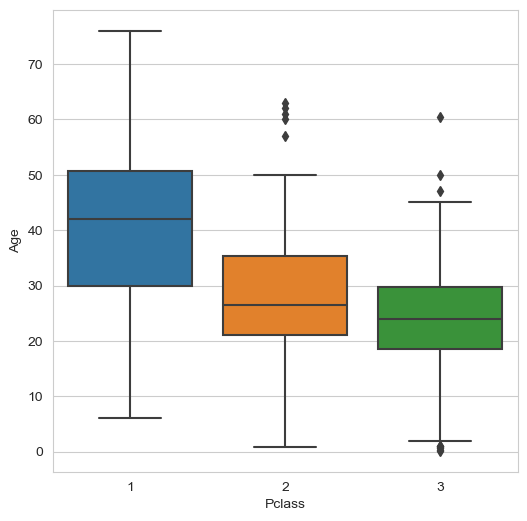

In [60]:
#this is for test dataset 
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.boxplot(y=test["Age"],x=test["Pclass"])

In [61]:
print("the avrage age in class 1 : ",test["Age"][test["Pclass"] == 1].mean())
print("the avrage age in class 2 : ",test["Age"][test["Pclass"] == 2].mean())
print("the avrage age in class 3 : ",test["Age"][test["Pclass"] == 3].mean())

the avrage age in class 1 :  40.91836734693877
the avrage age in class 2 :  28.7775
the avrage age in class 3 :  24.02794520547945


In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [63]:
train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 1) ,"Age"] = 38
train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 2) ,"Age"] = 30
train.loc[(train["Age"].isna().any() == True) and (train["Pclass"] == 3) ,"Age"] = 25

test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 1) ,"Age"] = 41
test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 2) ,"Age"] = 29
test.loc[(test["Age"].isna().any() == True) and (test["Pclass"] == 3) ,"Age"] = 24


In [64]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [65]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [66]:
## compute the most frequent of Embarked in training set 

mode = train["Embarked"].mode()[0]


In [67]:
train["Embarked"].fillna(mode,inplace=True)

In [68]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [69]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [70]:
# fill the missing value of Fare column in tset dataset to median 
median = test["Fare"].median()
median

14.4542

In [71]:
test["Fare"].fillna(median,inplace=True)

In [72]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [73]:
# combine train dataset and test in one dataframe 
combine = pd.concat([train,test],axis=0).reset_index(drop=True) 

combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,25.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,25.0,0,0,8.0500,S


In [74]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [75]:
# convert Sex column to numeric 

combine["Sex"] = combine["Sex"].map({"male":0,"female":1})

In [76]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,25.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,25.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,38.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,25.0,0,0,8.0500,S


## 4.6 Data transformation


 Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.


Text(0.5, 1.0, 'Passenger Fare Distribution')

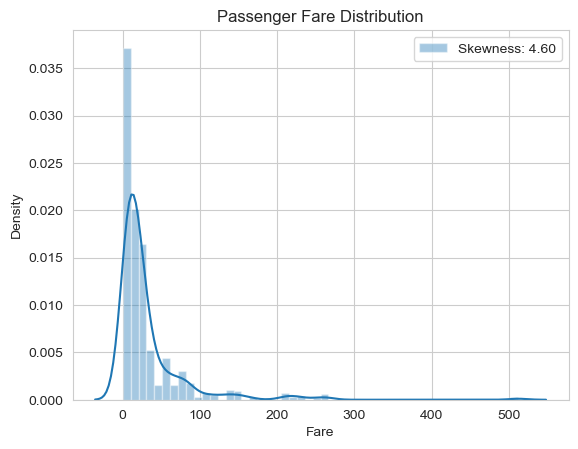

In [77]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')



In [78]:
combine["Fare"] = combine["Fare"].map(lambda x : np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution')

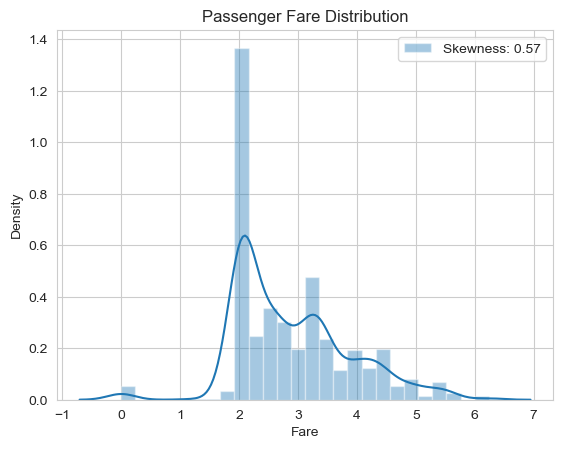

In [79]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')


##  4.7 Feature engineering

In [80]:
# create new column called Title 
combine["Title"] = [name.split(",")[1].split(".")[0].strip() for name in combine["Name"] ]
combine[["Name","Title"]]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
1287,"Spector, Mr. Woolf",Mr
1288,"Oliva y Ocana, Dona. Fermina",Dona
1289,"Saether, Mr. Simon Sivertsen",Mr
1290,"Ware, Mr. Frederick",Mr


In [81]:
combine["Title"].value_counts()

Mr              752
Miss            252
Mrs             197
Master           57
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [82]:
combine["Title"].nunique()

18

In [83]:
# "male":0,"female":1
pd.crosstab(combine['Title'], combine['Sex'])


Sex,0,1
Title,,
Capt,1,0
Col,4,0
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,57,0


In [84]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')



In [85]:
combine['Title'].value_counts()


Mr        752
Miss      256
Mrs       198
Master     57
Rare       29
Name: Title, dtype: int64

In [86]:
combine[["Survived","Title"]].groupby("Title").mean().sort_values(by = "Survived",ascending = False)

,Survived
Title,
Mrs,0.793651
Miss,0.711864
Master,0.638889
Rare,0.347826
Mr,0.158203


In [87]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,25.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,25.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,38.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,25.0,0,0,2.085672,S,Mr


In [88]:
# create new column called FamilySize from SibSp and Parch columns 

combine["FamilySize"] = combine["SibSp"] + combine["Parch"] +1 
combine[["SibSp","Parch","FamilySize"]].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [89]:
combine[["FamilySize","Survived"]].groupby("FamilySize").mean().sort_values(by = "Survived" , ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.076923
6,0.052632
8,0.000000
11,NaN


In [90]:
# we create new column calles IsAlone 

combine["IsAlone"] = 0 
combine.loc[combine["FamilySize"] == 1 , "IsAlone"] = 1

In [91]:
combine[["IsAlone","Survived"]].groupby("IsAlone").mean().sort_values(by = "Survived" , ascending = False)

,Survived
IsAlone,
0,0.519288
1,0.303538


In [92]:
combine = combine.drop(["FamilySize","SibSp","Parch"], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,25.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,25.0,2.070022,S,Miss,1
3,4,1.0,1,1,38.0,3.972177,S,Mrs,0
4,5,0.0,3,0,25.0,2.085672,S,Mr,1


In [93]:
combine

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,25.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,25.0,2.070022,S,Miss,1
3,4,1.0,1,1,38.0,3.972177,S,Mrs,0
4,5,0.0,3,0,25.0,2.085672,S,Mr,1
...,...,...,...,...,...,...,...,...,...
1287,1305,NaN,3,0,24.0,2.085672,S,Mr,1
1288,1306,NaN,1,1,41.0,4.690430,C,Rare,1
1289,1307,NaN,3,0,24.0,1.981001,S,Mr,1
1290,1308,NaN,3,0,24.0,2.085672,S,Mr,1


In [94]:
combine.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            0
IsAlone          0
dtype: int64

In [95]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [96]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

## 4.8 Feature Encoding

In [97]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'],drop_first=True)
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em',drop_first=True)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,1,0.0,3,0,25,1.981001,0,0,1,0,0,0,1
1,2,1.0,1,1,38,4.266662,0,0,0,1,0,0,0
2,3,1.0,3,1,25,2.070022,1,1,0,0,0,0,1
3,4,1.0,1,1,38,3.972177,0,0,0,1,0,0,1
4,5,0.0,3,0,25,2.085672,1,0,1,0,0,0,1


In [98]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [99]:
train.shape

(874, 13)

In [100]:
test.shape

(418, 13)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,1,0.0,3,0,25,1.981001,0,0,1,0,0,0,1
1,2,1.0,1,1,38,4.266662,0,0,0,1,0,0,0
2,3,1.0,3,1,25,2.070022,1,1,0,0,0,0,1
3,4,1.0,1,1,38,3.972177,0,0,0,1,0,0,1
4,5,0.0,3,0,25,2.085672,1,0,1,0,0,0,1


In [102]:
# we will drop PassengerId from train dataset

train = train.drop("PassengerId",axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,0.0,3,0,25,1.981001,0,0,1,0,0,0,1
1,1.0,1,1,38,4.266662,0,0,0,1,0,0,0
2,1.0,3,1,25,2.070022,1,1,0,0,0,0,1
3,1.0,1,1,38,3.972177,0,0,0,1,0,0,1
4,0.0,3,0,25,2.085672,1,0,1,0,0,0,1


In [103]:
train["Survived"] = train["Survived"].astype("int")
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,0,3,0,25,1.981001,0,0,1,0,0,0,1
1,1,1,1,38,4.266662,0,0,0,1,0,0,0
2,1,3,1,25,2.070022,1,1,0,0,0,0,1
3,1,1,1,38,3.972177,0,0,0,1,0,0,1
4,0,3,0,25,2.085672,1,0,1,0,0,0,1


In [104]:
train["Survived"].value_counts()

0    536
1    338
Name: Survived, dtype: int64

In [105]:
# --------- 

test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
874,892,NaN,3,0,24,2.057860,1,0,1,0,0,1,0
875,893,NaN,3,1,24,1.945910,0,0,0,1,0,0,1
876,894,NaN,2,0,29,2.270836,1,0,1,0,0,1,0
877,895,NaN,3,0,24,2.159003,1,0,1,0,0,0,1
878,896,NaN,3,1,24,2.508582,0,0,0,1,0,0,1


In [106]:
# we will drop Survived from test dataset

test = test.drop("Survived",axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
874,892,3,0,24,2.057860,1,0,1,0,0,1,0
875,893,3,1,24,1.945910,0,0,0,1,0,0,1
876,894,2,0,29,2.270836,1,0,1,0,0,1,0
877,895,3,0,24,2.159003,1,0,1,0,0,0,1
878,896,3,1,24,2.508582,0,0,0,1,0,0,1


## 4.9 Modelling and Hyperparameter Tuning

In [107]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId",axis=1).copy()

In [108]:
X_train.shape

(874, 11)

In [109]:
Y_train.shape

(874,)

In [110]:
X_test.shape

(418, 11)

In [111]:
X_train

,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
0,3,0,25,1.981001,0,0,1,0,0,0,1
1,1,1,38,4.266662,0,0,0,1,0,0,0
2,3,1,25,2.070022,1,1,0,0,0,0,1
3,1,1,38,3.972177,0,0,0,1,0,0,1
4,3,0,25,2.085672,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
869,2,0,30,2.564949,1,0,0,0,1,0,1
870,1,1,38,3.401197,1,1,0,0,0,0,1
871,3,1,25,3.154870,0,1,0,0,0,0,1
872,1,0,38,3.401197,1,0,1,0,0,0,0


In [112]:
X_test

,Pclass,Sex,Age,Fare,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_Q,Em_S
874,3,0,24,2.057860,1,0,1,0,0,1,0
875,3,1,24,1.945910,0,0,0,1,0,0,1
876,2,0,29,2.270836,1,0,1,0,0,1,0
877,3,0,24,2.159003,1,0,1,0,0,0,1
878,3,1,24,2.508582,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1287,3,0,24,2.085672,1,0,1,0,0,0,1
1288,1,1,41,4.690430,1,0,0,0,1,0,0
1289,3,0,24,1.981001,1,0,1,0,0,0,1
1290,3,0,24,2.085672,1,0,1,0,0,0,1


In [113]:

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.22

In [ ]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
RFC_param_grid = {"max_depth": [100,250, 500 , 1000],
              "max_features": ["sqrt", "log2"],
              "bootstrap": [False,True],
              "n_estimators" :[100,250, 500 , 1000],
              "criterion": ["gini", "entropy", "log_loss"],
               "warm_start":[False,True],
                "class_weight" : ["balanced", "balanced_subsample"]
                }


GSRFC = GridSearchCV(RFC,param_grid = RFC_param_grid, cv=5, scoring="accuracy")

GSRFC.fit(X_train,Y_train)

RFC_best = GSRFC.best_estimator_

# Best score
GSRFC.best_score_

In [ ]:
# it will take some time then will give score 0.80

In [115]:
# the score of Grid search is less than baseline model, so we will use the baseline model 

In [116]:
# submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
# submit.to_csv("Submit_Final.csv", index = False)

In [117]:

# pickle.dump(random_forest, open('Titanic_model.pkl', 'wb'))

# 5. Metrics

The metrics used to evaluate the performance of classification model are accuracy, precision, recall, F1 score, and ROC AUC.

but because the dataset was take from Competition on Kaggle we don't have y label of test set, so only we have is accuracy from Leaderboard on Kaggle, which is 75% accuracy. we can increase this by take more data and fix the problem of imbalance dataset.

# 6. Challenges in the project

1. - we must know the data very clear so we do a lot of EDA. 
2. - we have some outliers rows, we must handle it, so we see it its few rows (17 rows), we will drop it
3. - we have 4 columns (Age, Cabin , Embarked , Fare) that have missing data, we must see what is the best way to fill it. So in Age column we take the mean of each class to fill the missing data. in Cabin column we see the value of it not help the model so we will drop it. In column Embarked we take mode value to fill missing data. In Fare column we take madian to fill the missing value.
4. - we have one column is skewness, so we must make it in good distributaions, so we do data transformation (log) to make it better.
5. - we have columns with not numric value so we must convert that to be numric value for the model.

# 7. Conclusions

In conclusion, building a machine learning model on the Titanic dataset can be a great project for beginners to learn about data analysis, data preprocessing, and model building techniques. The project can provide insights into the factors that contributed to the survival of passengers on the Titanic.

# 8. Business Impact

The business impact of building a machine learning model on the Titanic dataset can be significant in the field of disaster planning. The insights gained from the project can help anyone want to know some factors that contribute to survival in a disaster and who think if face disaster.

# 9. Project Reflection



Reflecting on the project, some of the key learnings include data analysis, data preprocessing, feature engineering, and model selection and other. The project also provided insights into the importance of data visualization and hyperparameter tuning in improving the performance of the model. Also it will be reference to anyone want to see the journey of classifiaction Machine learning model. 

# 10. Future Work

1. Try advance technique to impute missing value  
2. Try advance algorithms.
3. Try advance EDA
4. Solve imbalance dataset issue 

# 11. Refrences 


1. https://github.com/chongjason914/kaggle-titanic/blob/main/titanic-tutorial.ipynb
2. https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook
3. https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier/notebook
4. https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook
5. https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

